In [1]:
import numpy as np

#
**Solution**
***

##
**Task 1**
***

In [2]:
#Defining eta and probability
etas = np.array([-np.sqrt(3), 0, np.sqrt(3)])
probs = np.array([1/6, 2/3, 1/6])

In [3]:
#Defining variables
beta = 0.9
gamma = 4.0
sigma = 0.16
mu = 0.04
w = 1.0
R_f = 1.0

In [4]:
#Calculating risky return
R  = R_f + mu + sigma * etas #As etas is an array, NumPy automatically calculates for every value
print(f"Rate of return on the risky asset is {R[0]:.2f}, {R[1]:.2f} or {R[2]:.2f}.")

Rate of return on the risky asset is 0.76, 1.04 or 1.32.


In [5]:
#Calculating mean expected rate of return
E_r = np.sum(probs * R)
print(f"The wheigted average rate of return on a risky asset is {E_r}.")

The wheigted average rate of return on a risky asset is 1.04.


In [6]:
#Calculating deviation and variance
deviation = R - E_r

quad = deviation ** 2

In [7]:
var = np.sum(quad * probs)
print(f"The variance is {var}, which is equal to 0.16^2")

The variance is 0.0256, which is equal to 0.16^2


As we can see, both the variance and the expected excess return are equal to the ones given in the table above.

The variance $\sigma$ is given as $0.16^2$, which is equal to $0.0256$\
The expected excess return $\mu$ is given as $0.04$, equal to our calculations of $\mu = 1.04$.

##
**Task 2**
***

In [8]:
#Creating function
def util(c, gamma):
    """
    Return the flow utility of consumption for a given risk aversion

    Parameters:
        c (float or array): consumption
        gamma (float): risk aversion

    Returns:
        utility value(u)
    """
    return -np.exp(-gamma * c)

In [9]:
import matplotlib.pyplot as plt

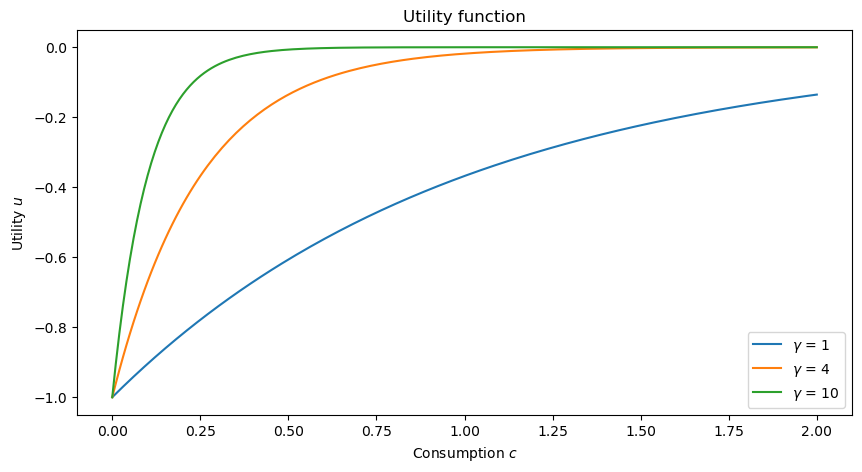

In [10]:
gamma_values = np.array([1, 4, 10])
c = np.linspace(0, 2, 200)

fig, ax = plt.subplots(figsize = (10, 5))

for g in gamma_values:
    ax.plot(
        c,
        util(c, g),
        label = rf"$\gamma$ = {g}"
    )

ax.legend()
ax.set_xlabel("Consumption $c$")
ax.set_ylabel("Utility $u$")
ax.set_title("Utility function")

plt.show()

As the utility function is given in the task, we can simply insert it into the function using the `np.exp()`function. This allows for the use of both scalars and arrays.

The plot is given in the figure UtilityFunction.

##
**Task 3**
***

In [11]:
def expected_util(s, alpha, beta, gamma, sigma, mu, w, etas, probs):
    '''
    Calculate the expected lifetime utility for given parameters.

    Parameters:
    s
    alpha
    beta
    gamma
    sigma
    mu
    w
    etas
    probs

    Returns:
    Expected lifetime utility
    '''
    R_f = 1.0

    c1 = w - s
    u1 = util(c1, gamma)

    Eu2 = 0.0

    for eta, p in zip(etas, probs):

        R = R_f + mu + sigma * eta
        c2 = (alpha * R + (1 - alpha) * R_f) * s

        Eu2 += p * util(c2, gamma)

    return u1 + beta * Eu2

In [12]:
print(f"{expected_util(0.5, 0.5, beta, gamma, sigma, mu, w, etas, probs):.4f}")

-0.2539


Testing the function with 50% of the wealth $w$ saved, and 50% of saved $s$ invested in a risky asset $\alpha$, gives a expected lifetime utility of -0.2539.

##
**Task 4**
***

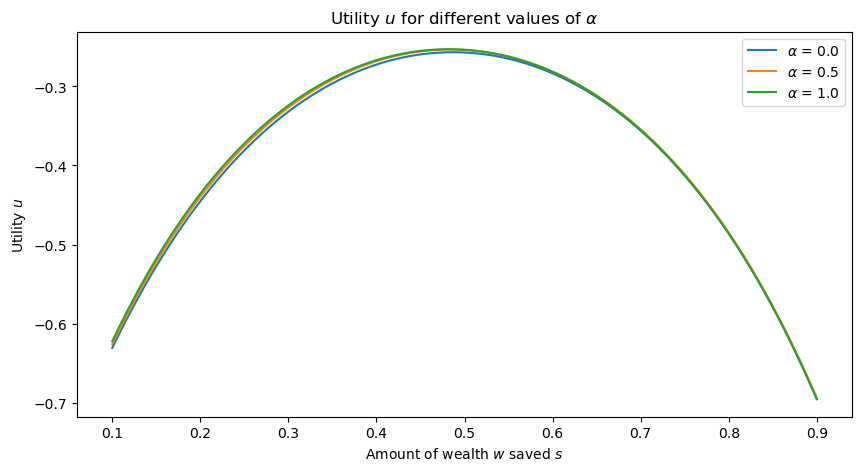

In [13]:
s_choices = np.linspace(0.1, w - 0.1, 200)

fig, ax = plt.subplots(figsize = (10, 5))

for a in np.linspace(0, 1, 3):
    utility = expected_util(
        s_choices,
        a,
        beta,
        gamma,
        sigma,
        mu,
        w,
        etas,
        probs)

    ax.plot(
        s_choices,
        utility,
        label = rf"$\alpha$ = {a}"
    )

ax.legend()
ax.set_xlabel(rf"Amount of wealth $w$ saved $s$")
ax.set_ylabel(rf"Utility $u$")
ax.set_title(rf"Utility $u$ for different values of $\alpha$")
#ax.set_ylim(-0.35, -0.25) #Could use this to see differences better

plt.show()

The graph is bent down (concave) because the investor is risk-averse, and has falling marginal utility. When savings $s$ si low, marginal utility $u$ increases, as this will increase consumption $c$ in period 2. At some point, the marginal utility will fall, as increased saving will mean a too big decrease in consumption in period 1. Diminishing marginal benefit of saving becomes smaller than the marginal cost.

##
**Task 5**
***

In [14]:
def find_optimum(beta, gamma, sigma, mu, w, etas, probs):
    '''
    Find the optimal savings level and risky share to maximize expected utility

    Parameters:
        beta (float):
            Discount factor
        gamma (float):
            Risk aversion
        sigma (float):
            Deviation of risky return shock
        mu (float):
            Expected excess return
        w (float9):
            Initial wealth
        etas (array or scalar):
            Possible outcomes of shock
        probs (array or scalar):
            Probability of outcomes of shock

    Returns:
        s_opt (float):
            Optimal level of saving
        a_opt (float):
            Optimal level invested in risky asset
        U_max (float):
            Maximal expected lifetime utility
    '''
    s_grid = np.linspace(1e-6, w - 1e-6, 1000)
    a_grid = np.linspace(0, 1, 1000)

    S, A = np.meshgrid(s_grid, a_grid) #Creating two arrays for testing every combination of values

    U = expected_util(S, A, beta, gamma, sigma, mu, w, etas, probs)

    imax = np.argmax(U) #Locating index of max value of u
    i, j = np.unravel_index(imax, U.shape) #Finding row and column of max value

    s_opt = S[i, j] #Locating max s-value
    a_opt = A[i, j] #Locating max a-value
    U_max = U[i, j]

    return s_opt, a_opt, U_max

##
**Task 6**
***

In [15]:
s_opt, a_opt, U_max = find_optimum(beta, gamma, sigma, mu, w, etas, probs)

print(f"The optimal level of saving is {s_opt:.4f}")
print(f"The optimal share invested in a risky asset is {a_opt:.4f}")
print(f"The maximal expected utility is {U_max:.4f}")

The optimal level of saving is 0.4825
The optimal share invested in a risky asset is 0.8098
The maximal expected utility is -0.2528


##
**Task 7**
***

In [57]:
gamma_grid = np.linspace(1, 10, 101) 

a_opt_grid = np.zeros(len(gamma_grid)) #Had to make a grid, as find_optimum only takes a single value for gamma

for i, g in enumerate(gamma_grid): #Compute the optimal levels of risky share for each value of gamma
    s_opt, a_opt, U_max = find_optimum(beta, g, sigma, mu, w, etas, probs)
    a_opt_grid[i] = a_opt #Stores all optimal values of alpha in a grid

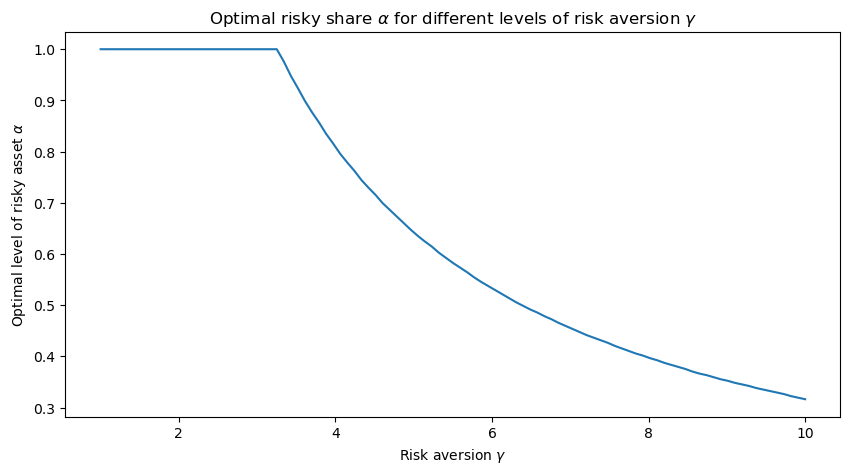

In [58]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(
    gamma_grid,
    a_opt_grid
)

ax.set_xlabel(rf"Risk aversion $\gamma$")
ax.set_ylabel(rf"Optimal level of risky asset $\alpha$")
ax.set_title(rf"Optimal risky share $\alpha$ for different levels of risk aversion $\gamma$")

plt.show()

As expected, the optimal share of risky assets $\alpha$ decreases as risk aversion $\gamma$ is increased. A more risk averse investor is less content with uncertainty regarding future consumption. The utility of investing in a risky asset decreases, as does the share invested, shifting investments towards risk-free assets.

##
**Task 8**
***

In [ ]:
sigma_grid = np.linspace(0.01, 0.5, 101)

a_opt_grid = np.zeros(len(sigma_grid)) #Refresh the grid

for i, sig in enumerate(sigma_grid): #Compute the optimal levels of risky share for each value of sigma
    s_opt, a_opt, U_max = find_optimum(beta, gamma, sig, mu, w, etas, probs)
    a_opt_grid[i] = a_opt #Stores all optimal values of alpha in a grid

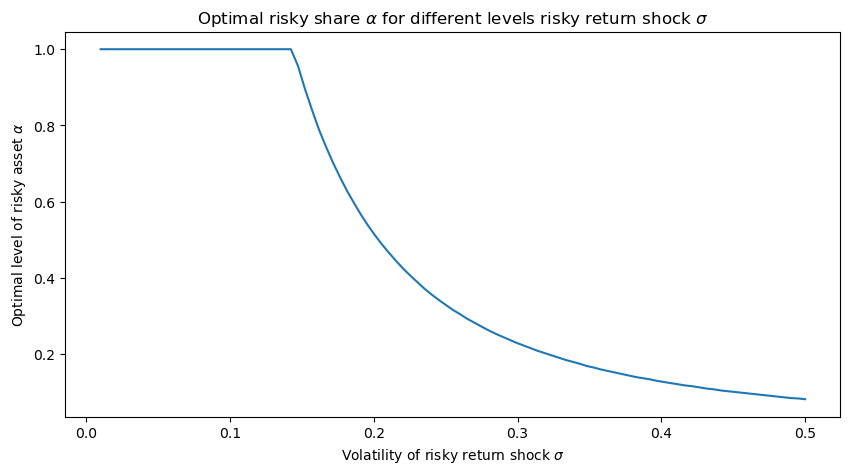

In [76]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(
    sigma_grid,
    a_opt_grid
)

ax.set_xlabel(rf"Volatility of risky return shock $\sigma$")
ax.set_ylabel(rf"Optimal level of risky asset $\alpha$")
ax.set_title(rf"Optimal risky share $\alpha$ for different levels risky return shock $\sigma$")

plt.show()

As the volatility of the risky return increases, we can see that the optimal risky share decreases. Higher volatility means the unceratinty regarding future consumption increases, incentivizing the investor to reduce their exposure to risky assets.